In [12]:
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.20.0
    Uninstalling tensorflow-2.20.0:
      Successfully uninstalled tensorflow-2.20.0


In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sms.csv')

In [7]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.3 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf


# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
# Assuming the file path issue is resolved and the dataframe 'df' is loaded

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sms.csv')
# Preprocessing: Language normalization, stopword removal, and tokenization
def preprocess_text(text):
    # Language normalization (convert to lowercase)
    text = text.lower()

    # Tokenization (split text into words)
    tokens = word_tokenize(text)

    # Remove stopwords (English + Urdu)
    stop_words = set(stopwords.words('english'))
    urdu_stopwords = ["کی", "ہے", "کا", "کیوں", "میں", "میں", "ہو", "وہ", "اس", "اور"]  # Add more Urdu stopwords as necessary
    stop_words.update(urdu_stopwords)

    # Remove stopwords from the tokens
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return " ".join(tokens)

df['Messages'] = df['Messages'].apply(preprocess_text)

# Feature Extraction: TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Messages']).toarray()

# Encoding labels (fraud, promotional, normal)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6417 - loss: 0.9633
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9584 - loss: 0.3198
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9850 - loss: 0.1171
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9905 - loss: 0.0653
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9943 - loss: 0.0419
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9807 - loss: 0.0686
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.6785 - loss: 0.6884
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.9806 - loss: 0.0589
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 242ms/step - accuracy: 0.9963 - loss: 0.0171
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.9991 - loss: 0.0061
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - accuracy: 0.9992 - loss: 0.0054
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9740 - loss: 0.0880
                     Precision    Recall  F1 Score   ROC-AUC  MLP Accuracy  \
Logistic Regression   0.973835  0.973310  0.973152  0.997768           NaN   
Random Forest         0.981494  0.981317  0.981240  0.998989           NaN   
SVM                   0.978008  0.977758  0.977661  0.997945           NaN   
XGBoost               0.979647  0.979537  0.979464  0.997186           NaN   
MLP                        NaN       NaN       NaN       NaN      0.977758   
LSTM                       NaN       N

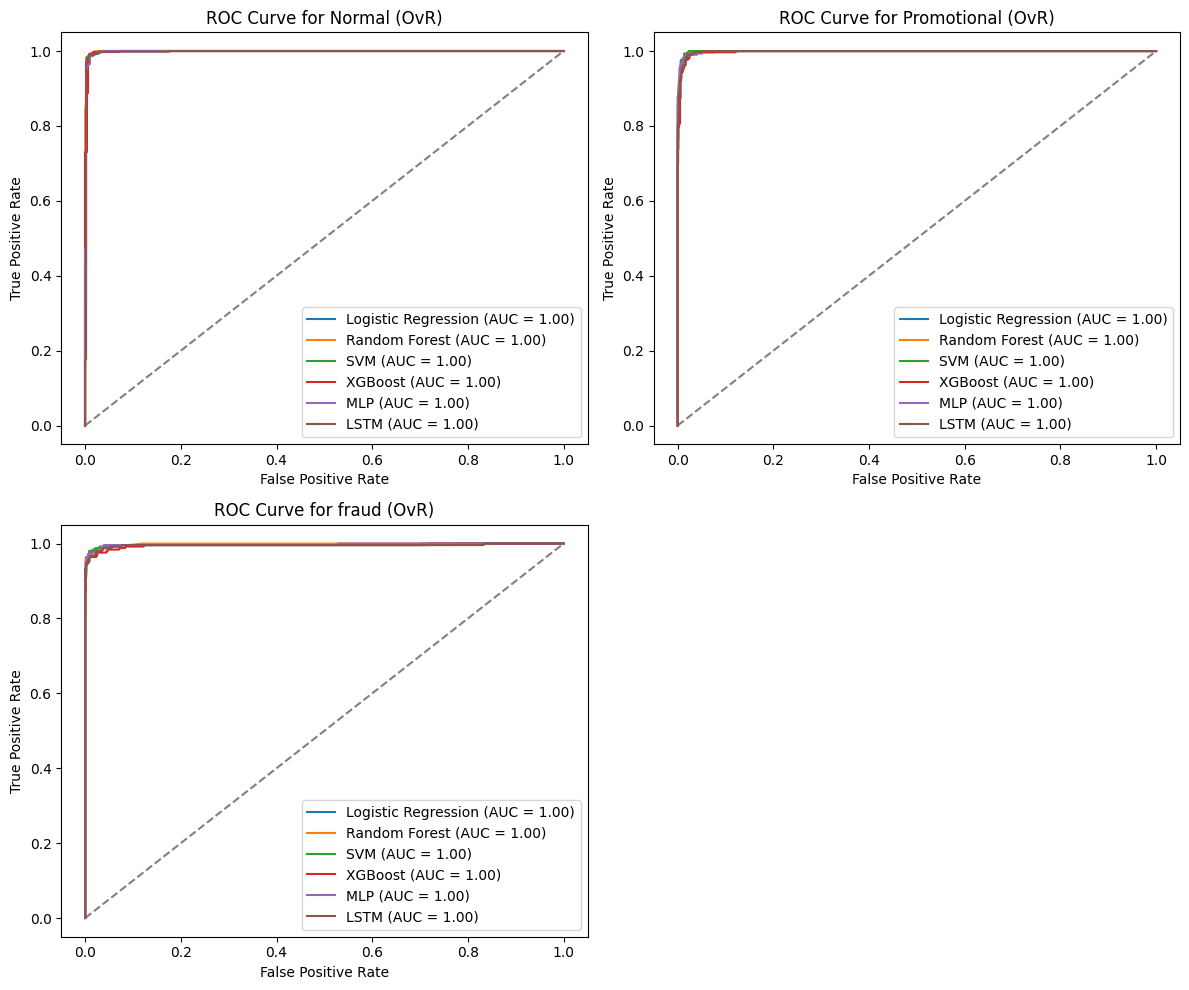

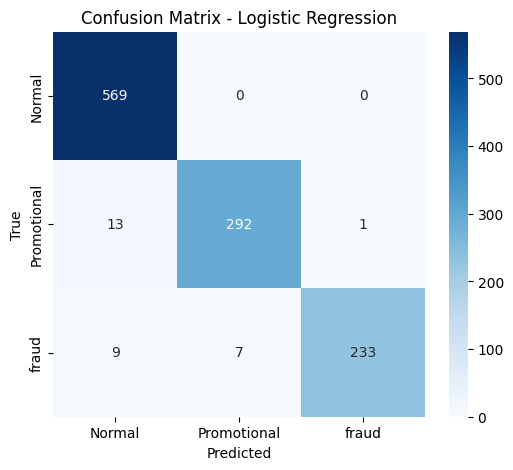

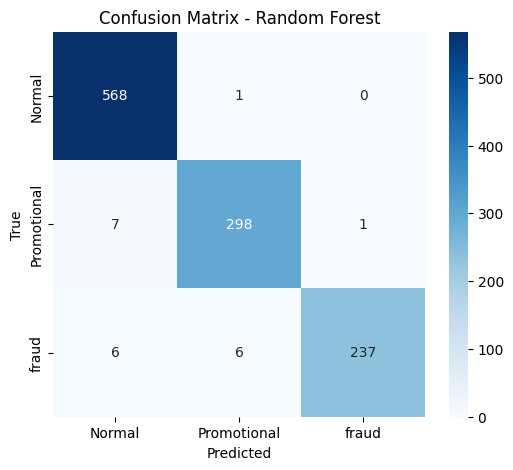

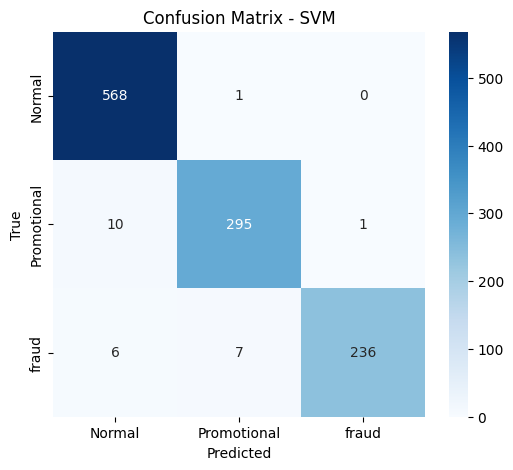

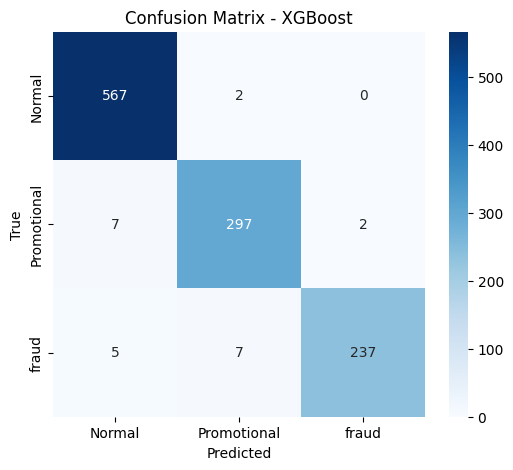

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


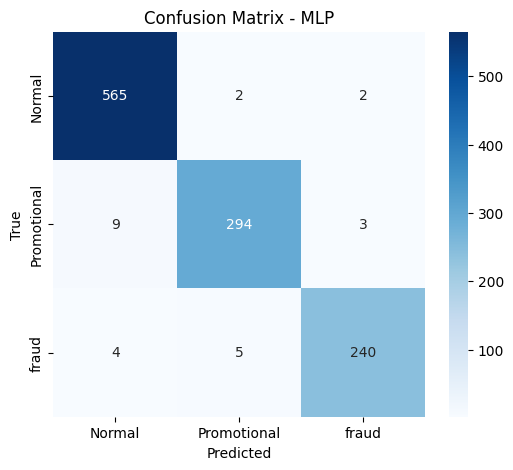

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


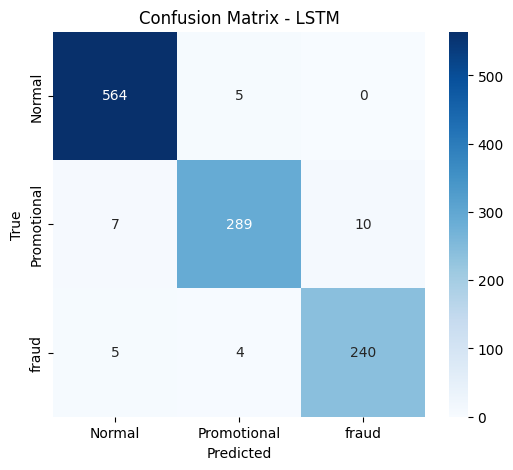

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


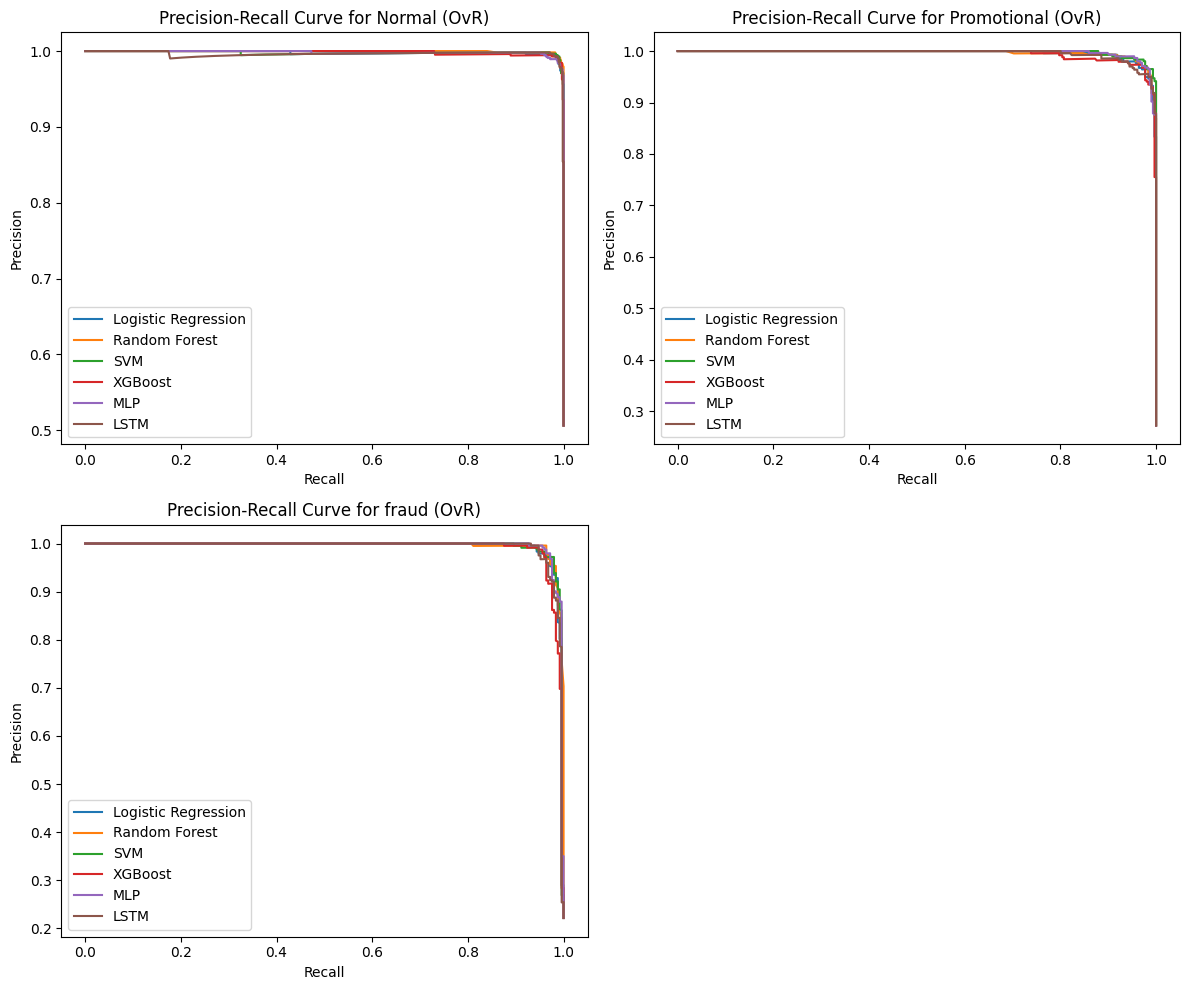

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer # Corrected import
from tensorflow.keras.preprocessing.sequence import pad_sequences # Corrected import
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, auc

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sms.csv')

# Data Preprocessing: Tokenization, Language normalization, Stopword removal
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    return " ".join(tokens)

df['Messages'] = df['Messages'].apply(preprocess_text)

# Feature Extraction: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Messages']).toarray()

# Encoding Labels (Fraud, Promotional, Normal)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

# Train-test split for ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True), # Added probability=True
    'XGBoost': XGBClassifier()
}

# Training and evaluating ML models
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Check if model has predict_proba for roc_auc_score
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = "N/A" # Handle models without predict_proba

    model_results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Deep Learning Models (MLP, LSTM)
# MLP Model
mlp_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)
mlp_accuracy = mlp_model.evaluate(X_test, y_test)[1]

# LSTM Model (needs sequences as input)
max_words = 5000  # based on TF-IDF max_features
tokenizer_lstm = Tokenizer(num_words=max_words)
tokenizer_lstm.fit_on_texts(df['Messages'])

# Separate train-test split for LSTM text data and labels
X_train_text, X_test_text, y_train_lstm, y_test_lstm = train_test_split(
    df['Messages'], df['Label'], test_size=0.2, random_state=42
)

# Convert text to sequences
X_train_seq = tokenizer_lstm.texts_to_sequences(X_train_text)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test_text)

# Pad sequences to ensure consistent input length
maxlen = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen)

# Convert target variables to TensorFlow Tensors for LSTM
y_train_lstm_encoded = label_encoder.transform(y_train_lstm) # Encode labels for LSTM
y_train_lstm_tensor = tf.convert_to_tensor(y_train_lstm_encoded, dtype=tf.int64)
y_test_lstm_encoded = label_encoder.transform(y_test_lstm) # Encode labels for LSTM
y_test_lstm_tensor = tf.convert_to_tensor(y_test_lstm_encoded, dtype=tf.int64)

# Create LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(3, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train_lstm_tensor, epochs=5, batch_size=64)
lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test_lstm_tensor)[1]


# Ensemble Strategy: Majority Voting
voting_clf = VotingClassifier(estimators=[('lr', models['Logistic Regression']),
                                          ('rf', models['Random Forest']),
                                          ('xgb', models['XGBoost'])], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)

# Model Performance Metrics Summary
performance_df = pd.DataFrame(model_results).T
performance_df.loc['MLP', 'MLP Accuracy'] = mlp_accuracy # Add MLP accuracy
performance_df.loc['LSTM', 'LSTM Accuracy'] = lstm_accuracy # Add LSTM accuracy
performance_df.loc['Voting', 'Voting Accuracy'] = voting_accuracy # Add Voting accuracy
print(performance_df)

# Visualization 5: ROC curves for models (One-vs-Rest)
plt.figure(figsize=(12, 10))
classes = label_encoder.classes_
for i, class_name in enumerate(classes):
    plt.subplot(2, 2, i + 1)
    plt.title(f'ROC Curve for {class_name} (OvR)')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

    # ROC for ML models
    for model_name, model in models.items():
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # ROC for MLP
    y_pred_mlp = mlp_model.predict(X_test)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp[:, i], pos_label=i)
    roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')

    # ROC for LSTM
    y_pred_lstm = lstm_model.predict(X_test_padded)
    fpr_lstm, tpr_lstm, _ = roc_curve(y_test_lstm_encoded, y_pred_lstm[:, i], pos_label=i)
    roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
    plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Visualization 6: Confusion Matrices
# Plot confusion matrix for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Confusion matrix for MLP
y_pred_mlp_classes = np.argmax(mlp_model.predict(X_test), axis=1)
cm_mlp = confusion_matrix(y_test, y_pred_mlp_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion matrix for LSTM
y_pred_lstm_classes = np.argmax(lstm_model.predict(X_test_padded), axis=1)
cm_lstm = confusion_matrix(y_test_lstm_encoded, y_pred_lstm_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Visualization 7: Precision-Recall curves (One-vs-Rest)
plt.figure(figsize=(12, 10))
for i, class_name in enumerate(classes):
    plt.subplot(2, 2, i + 1)
    plt.title(f'Precision-Recall Curve for {class_name} (OvR)')

    # Precision-Recall for ML models
    for model_name, model in models.items():
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test)
            precision, recall, _ = precision_recall_curve(y_test == i, y_pred_prob[:, i])
            plt.plot(recall, precision, label=f'{model_name}')

    # Precision-Recall for MLP
    y_pred_mlp = mlp_model.predict(X_test)
    precision_mlp, recall_mlp, _ = precision_recall_curve(y_test == i, y_pred_mlp[:, i])
    plt.plot(recall_mlp, precision_mlp, label=f'MLP')

    # Precision-Recall for LSTM
    y_pred_lstm = lstm_model.predict(X_test_padded)
    precision_lstm, recall_lstm, _ = precision_recall_curve(y_test_lstm_encoded == i, y_pred_lstm[:, i])
    plt.plot(recall_lstm, precision_lstm, label=f'LSTM')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6393 - loss: 0.9736
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9505 - loss: 0.3621
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9848 - loss: 0.1280
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9899 - loss: 0.0674
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9960 - loss: 0.0419
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0732
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.7003 - loss: 0.7170
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.9830 - loss: 0.0542
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.9943 - loss: 0.0203
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - accuracy: 0.9984 - loss: 0.0055
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9981 - loss: 0.0094
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9814 - loss: 0.0732
                     Precision    Recall  F1 Score  Accuracy  MLP Accuracy  \
Logistic Regression   0.969407  0.968861  0.968754  0.968861      0.980427   
Random Forest         0.981338  0.981317  0.981309  0.981317      0.980427   
SVM                   0.970123  0.969751  0.969625  0.969751      0.980427   
XGBoost               0.965477  0.965302  0.965180  0.965302      0.980427   

                     LSTM Accuracy  Voting Accuracy  
Logistic Regression       0.983096         0.977758  
Random 

/tmp/ipython-input-945818344.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


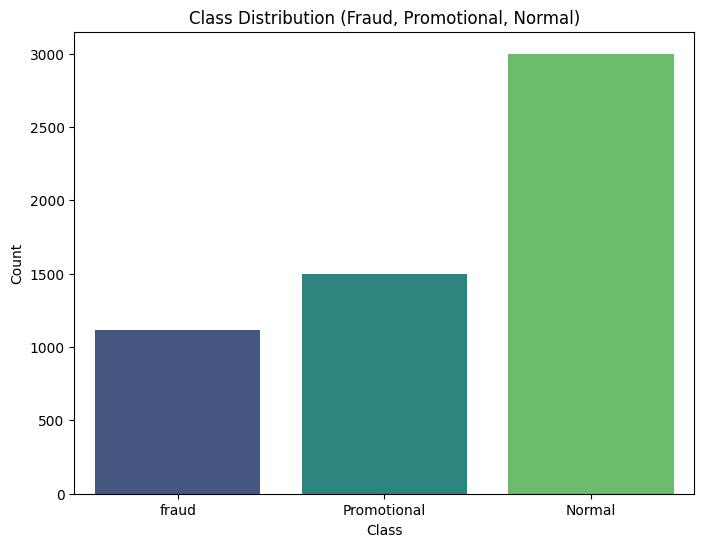

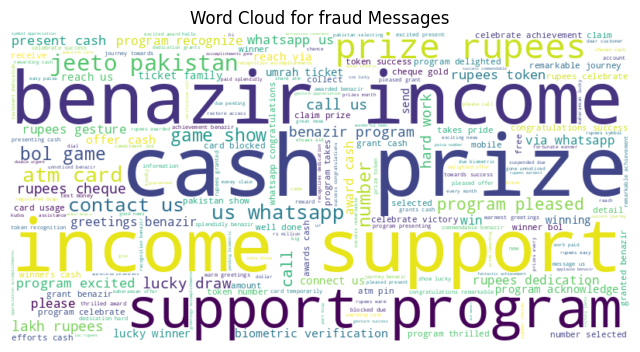

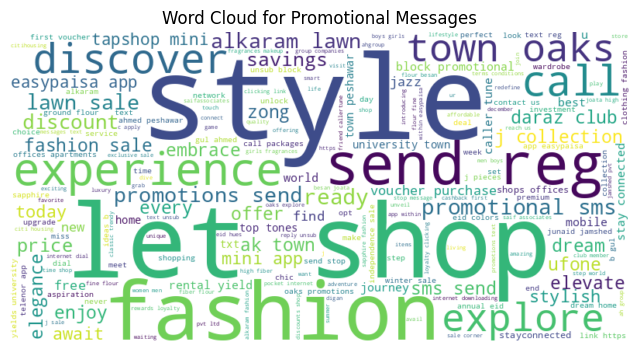

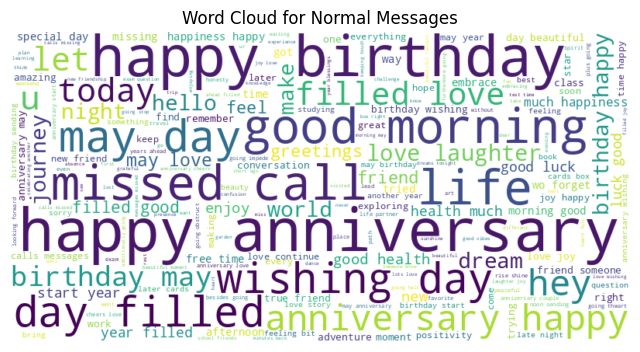

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


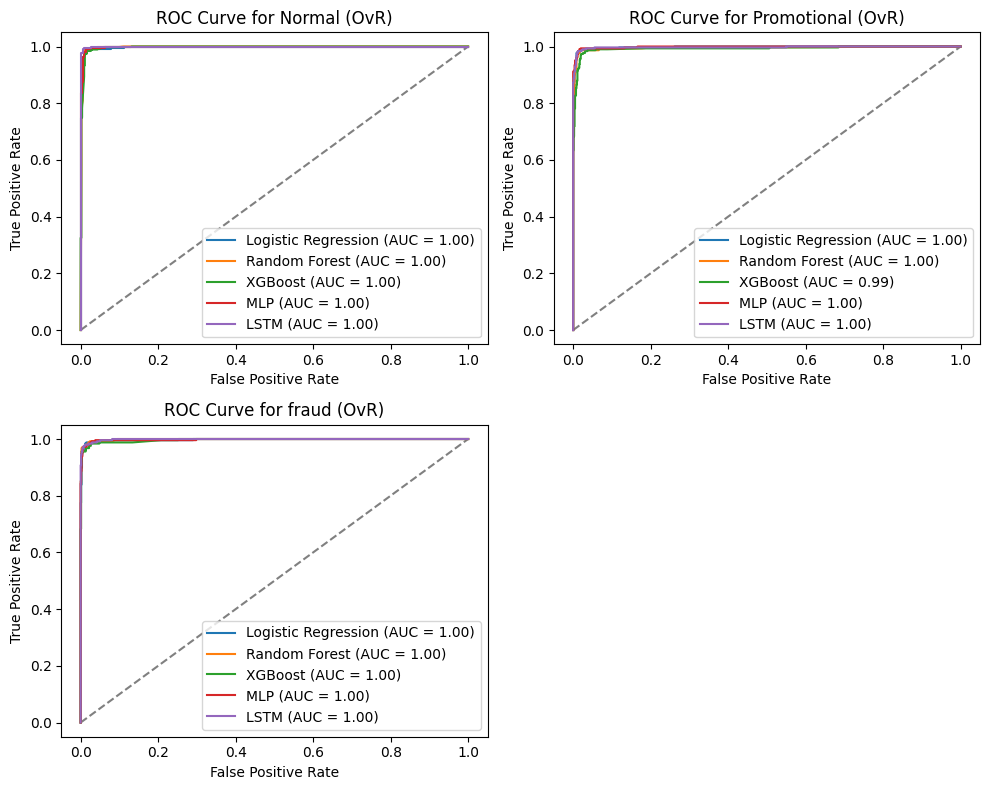

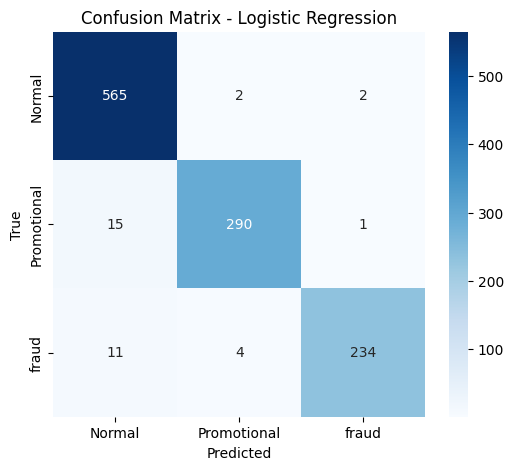

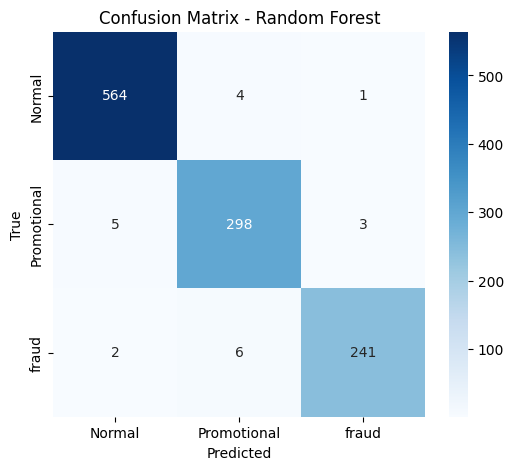

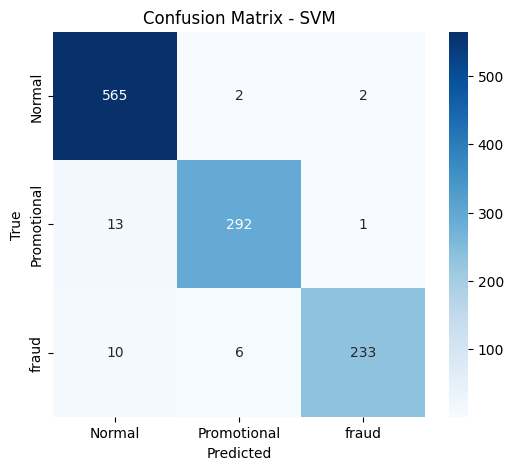

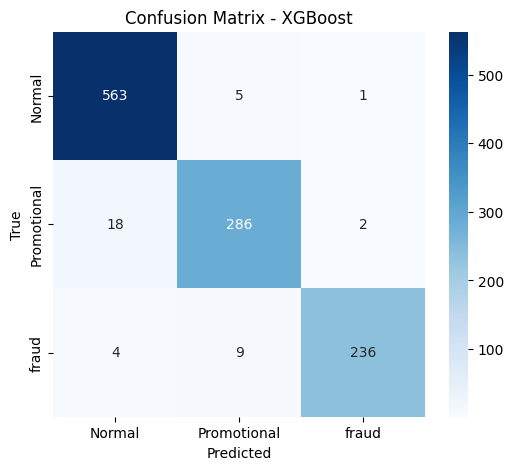

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


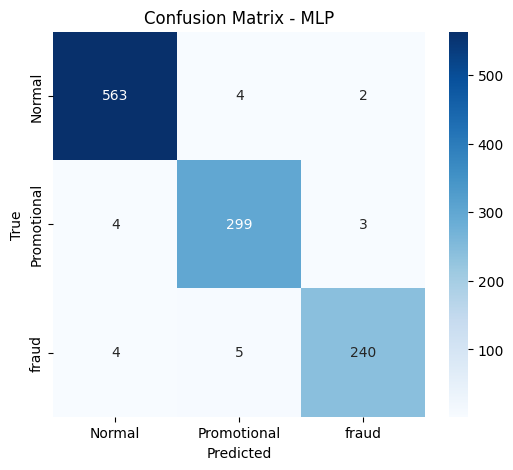

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


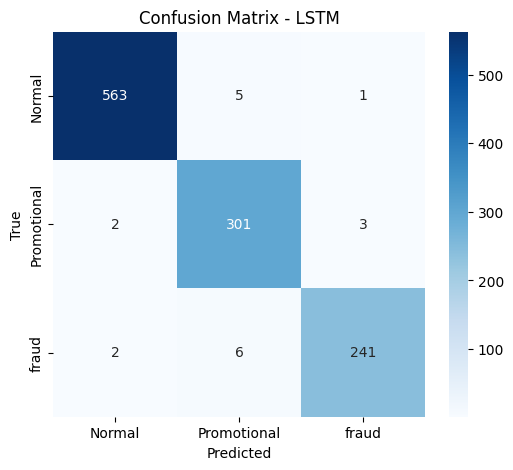

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


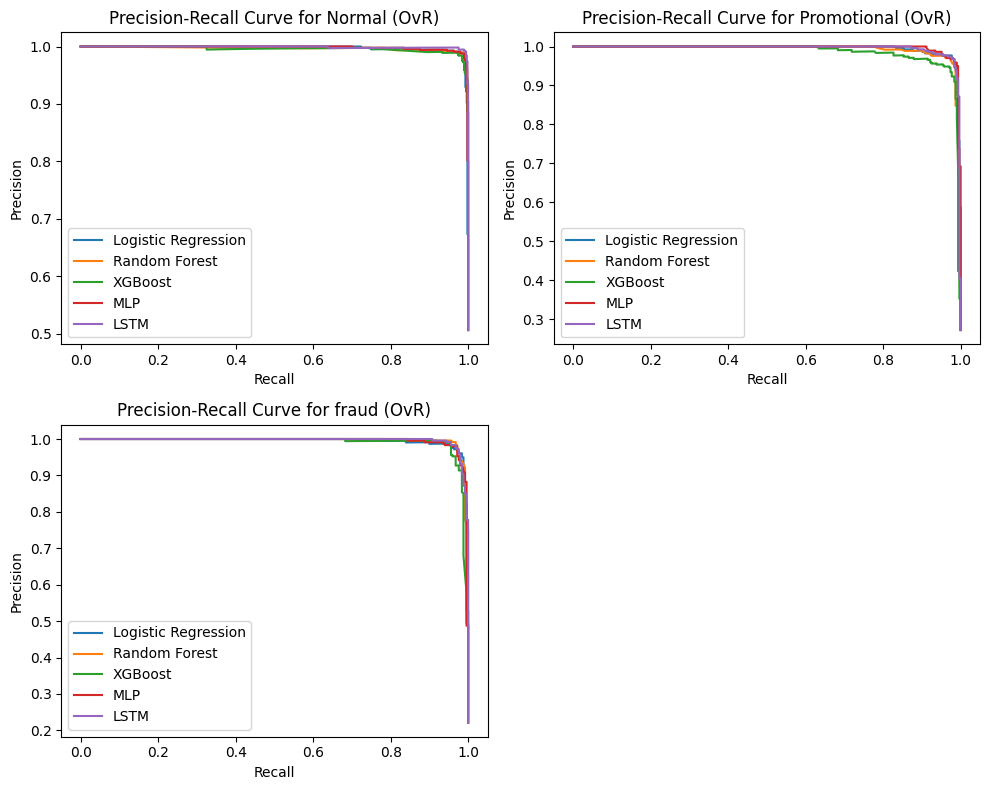

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sms.csv')

# Data Preprocessing: Tokenization, Language normalization, Stopword removal
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    stop_words = set(nltk.corpus.stopwords.words('english')) | {"کی", "ہے", "کا", "کیوں", "میں"}  # English + Urdu stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove punctuation and stopwords
    return " ".join(tokens)

df['Messages'] = df['Messages'].apply(preprocess_text)

# Feature Extraction: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Messages']).toarray()

# Encoding Labels (Fraud, Promotional, Normal)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

# Train-test split for ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

# Training and evaluating ML models
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate Precision, Recall, F1, and Accuracy
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    model_results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    }

# Deep Learning Models (MLP, LSTM, BERT)
# MLP Model
mlp_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)
mlp_accuracy = mlp_model.evaluate(X_test, y_test)[1]

# LSTM Model (needs sequences as input)
max_words = 5000  # based on TF-IDF max_features
tokenizer_lstm = Tokenizer(num_words=max_words)
tokenizer_lstm.fit_on_texts(df['Messages'])

# Split the text data for LSTM
X_train_text, X_test_text, y_train_lstm, y_test_lstm = train_test_split(
    df['Messages'], df['Label'], test_size=0.2, random_state=42
)

# Convert text to sequences for LSTM
X_train_seq = tokenizer_lstm.texts_to_sequences(X_train_text)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test_text)

# Pad sequences
maxlen = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen)

# Encode and convert LSTM target variables to TensorFlow Tensors
y_train_lstm_encoded = label_encoder.transform(y_train_lstm)
y_test_lstm_encoded = label_encoder.transform(y_test_lstm)

y_train_lstm_tensor = tf.convert_to_tensor(y_train_lstm_encoded, dtype=tf.int64)
y_test_lstm_tensor = tf.convert_to_tensor(y_test_lstm_encoded, dtype=tf.int64)

# Create LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(3, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train_lstm_tensor, epochs=5, batch_size=64)
lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test_lstm_tensor)[1]


# BERT Model (tokenization and fine-tuning BERT)
# tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
# model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# inputs_bert = tokenizer_bert(df['Messages'].tolist(), return_tensors="tf", padding=True, truncation=True, max_length=512)
# model_bert.fit(inputs_bert, y_train, epochs=3)

# Ensemble Strategy: Majority Voting
voting_clf = VotingClassifier(estimators=[('lr', models['Logistic Regression']),
                                          ('rf', models['Random Forest']),
                                          ('xgb', models['XGBoost'])], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)

# Model Performance Metrics Summary
performance_df = pd.DataFrame(model_results).T
performance_df['MLP Accuracy'] = mlp_accuracy
performance_df['LSTM Accuracy'] = lstm_accuracy # Added LSTM accuracy
performance_df['Voting Accuracy'] = voting_accuracy
print(performance_df)

# Visualization 1: Class Distribution Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Class Distribution (Fraud, Promotional, Normal)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualization 2: Word Cloud for Fraud, Promotional, and Normal Messages
classes = df['Label'].unique()

for cls in classes:
    plt.figure(figsize=(8, 6))
    text = ' '.join(df[df['Label'] == cls]['Messages'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {cls} Messages')
    plt.axis('off')
    plt.show()

# Evaluation Metrics Plot
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve

# ROC Curves (One-vs-Rest)
plt.figure(figsize=(10, 8))
classes = label_encoder.classes_
for i, class_name in enumerate(classes):
    plt.subplot(2, 2, i + 1)
    plt.title(f'ROC Curve for {class_name} (OvR)')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

    # ROC for ML models
    for model_name, model in models.items():
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # ROC for MLP
    y_pred_mlp = mlp_model.predict(X_test)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp[:, i], pos_label=i)
    roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')

    # ROC for LSTM
    y_pred_lstm = lstm_model.predict(X_test_padded)
    fpr_lstm, tpr_lstm, _ = roc_curve(y_test_lstm_encoded, y_pred_lstm[:, i], pos_label=i)
    roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
    plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


# Confusion Matrices for all models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Confusion matrix for MLP
y_pred_mlp_classes = np.argmax(mlp_model.predict(X_test), axis=1)
cm_mlp = confusion_matrix(y_test, y_pred_mlp_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion matrix for LSTM
y_pred_lstm_classes = np.argmax(lstm_model.predict(X_test_padded), axis=1)
cm_lstm = confusion_matrix(y_test_lstm_encoded, y_pred_lstm_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Precision-Recall Curves (One-vs-Rest)
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    plt.subplot(2, 2, i + 1)
    plt.title(f'Precision-Recall Curve for {class_name} (OvR)')

    # Precision-Recall for ML models
    for model_name, model in models.items():
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test)
            precision, recall, _ = precision_recall_curve(y_test == i, y_pred_prob[:, i])
            plt.plot(recall, precision, label=f'{model_name}')

    # Precision-Recall for MLP
    y_pred_mlp = mlp_model.predict(X_test)
    precision_mlp, recall_mlp, _ = precision_recall_curve(y_test == i, y_pred_mlp[:, i])
    plt.plot(recall_mlp, precision_mlp, label=f'MLP')

    # Precision-Recall for LSTM
    y_pred_lstm = lstm_model.predict(X_test_padded)
    precision_lstm, recall_lstm, _ = precision_recall_curve(y_test_lstm_encoded == i, y_pred_lstm[:, i])
    plt.plot(recall_lstm, precision_lstm, label=f'LSTM')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Visualization: Experimental Pipeline Diagram
# You can draw the experimental pipeline as a diagram using tools like draw.io, then load it into your LaTeX document